In [1]:
import functions
from hosd_python.hosd import apply_hosd # library that I converted from MATLAB
import interactive_analysis # developed by Lena's colleagues
import matplotlib.pyplot as plt
import numpy as np

### After the ICA, generally we are able to select which component corresponds to mother and which to fetal, however sometimes it is very difficult.

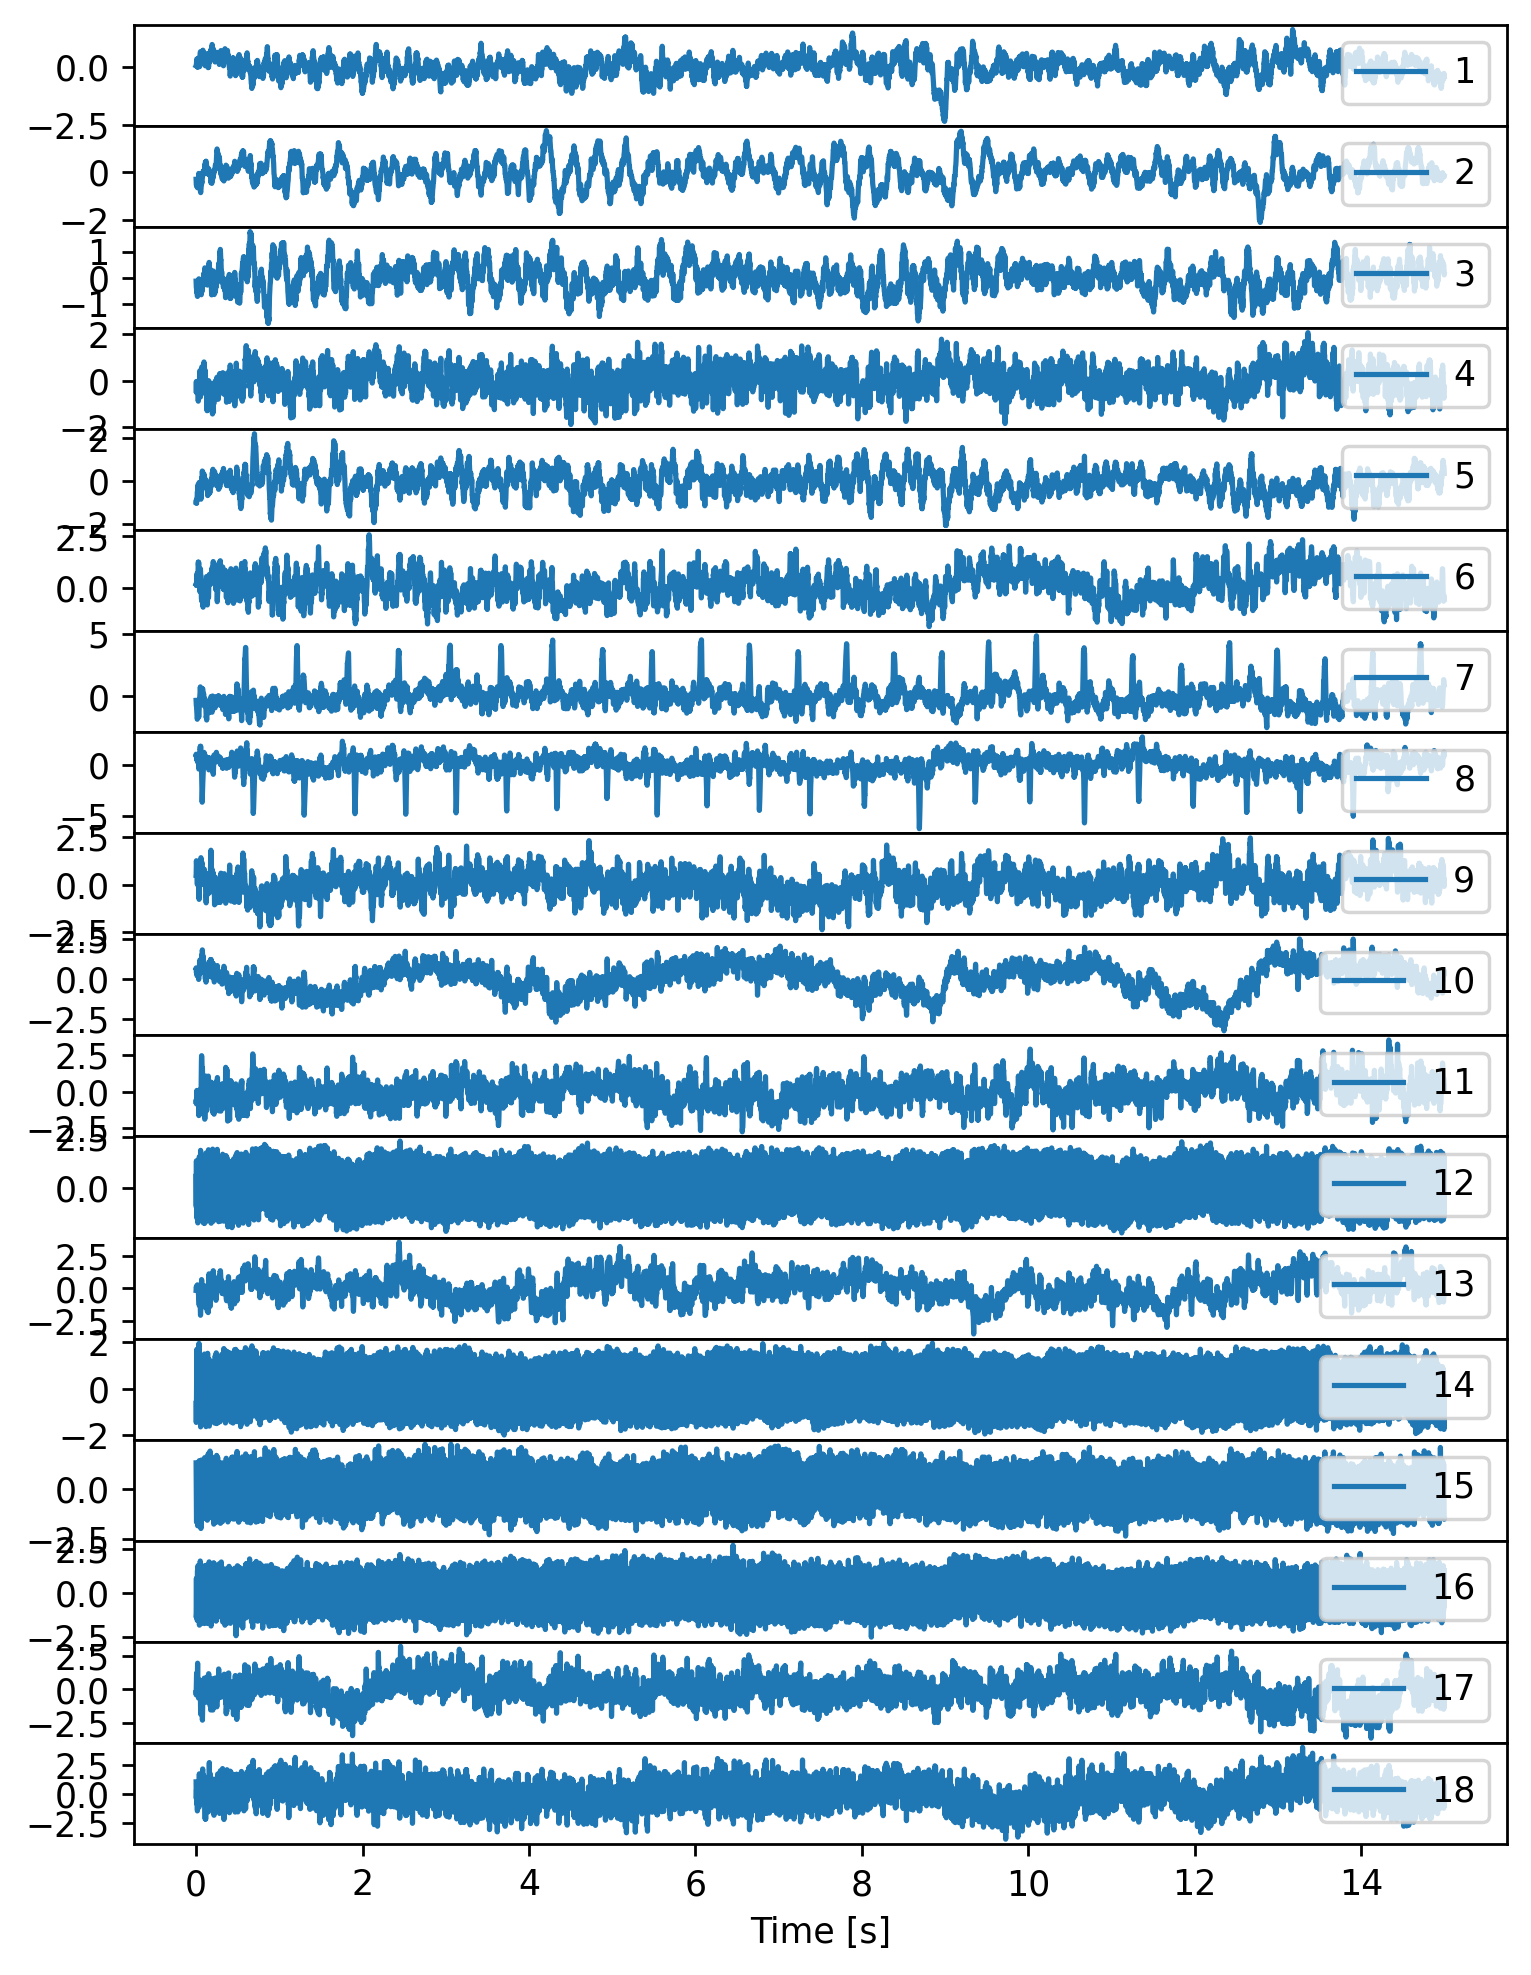

In [2]:
data=np.load('patient_ICA/P045_S01_R002_ICA.npy')
window_size=int(1400)
time_axis=np.linspace(0,int(window_size)-1,num=int(window_size))

no_ica_chans = int(data.shape[1])
span = 15
offset = 100
fs=1000
ms2s = lambda x, _:f'{x/1000:g}'

fig, ax = plt.subplots(no_ica_chans, 1, sharex=True, figsize=(18 / 2.54, 24 / 2.54), dpi=250)
fig.subplots_adjust(hspace=0)

for i in range(no_ica_chans):
    ax[i].plot(data[int(offset * fs):int(fs * (offset + span)), i], label=str(i+1))
    ax[i].legend(loc=1)
ax[-1].xaxis.set_major_formatter(ms2s)
ax[-1].set_xlabel('Time [s]')
plt.show()

### These indexes should be chosen manually from ICA data everytime

In [3]:
# These indexes should be chosen manually from ICA data everytime
mother_index = 7 # manually selected for P45 R002
fetus_index = 6 # manually selected for P45 R002

### in the original script, they use matlab.engine library to call a matlab script with the hosd library:
https://github.com/ckovach/HOSD

However, since the library is quite long, I asked Lena, and she told me it is enough to convert only the used parts of the library so I just created the python class only for the used parts

In [4]:
# calls matlab engine and executes a matlab script with the given data
# beat, detect = functions.matlab_hos(data[:,fetus_index], window_size)

# python equivalent of the matlab script
beat, detect = apply_hosd(data[:,fetus_index], window_size)

### Here they create a interactive plot to select the important points by an expert, then they save this timings to create a patient report

[[nan, nan], [nan, nan], [nan, nan]]


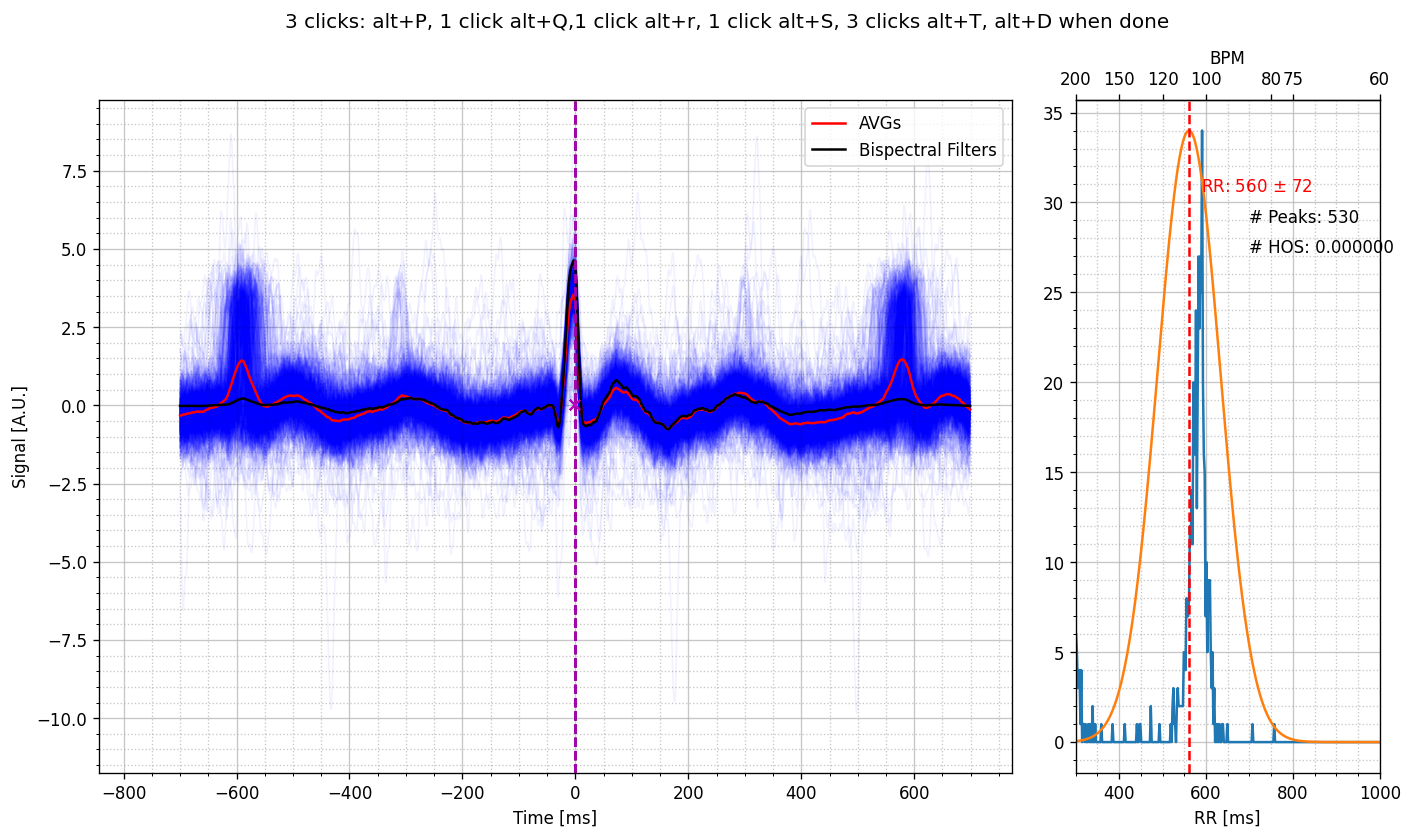

KeyboardInterrupt: 

In [5]:
RR, sigma_RR, peaks, popt_RRs, yy, xx = functions.detect_beats(detect)
try:
    savgol_median = savgol_filter(np.diff(peaks), 41, 3)
    avg_peaks_list = peaks[np.where(np.square((np.diff(peaks) - savgol_median) / sigma_RR) < 2)]
except:
    avg_peaks_list = peaks

peaks = avg_peaks_list
if len(peaks)<3:
    print('skipped (low peak count)')
else:
    slice_box, avg_mean,worked = functions.avg_based_QRScomplex(data[:,fetus_index],
                                                                peaks,sigma_RR, box_size=window_size)
    segmentation_data=interactive_analysis.interactive_ploter(np.array(slice_box),
                                                                time_axis-window_size/2,
                                                                add_lines=[avg_mean,beat],
                                                                sideplot=[xx,yy,popt_RRs,RR,sigma_RR,0])

### To show they produce equivalent plots:

[[nan, nan], [nan, nan], [nan, nan]]


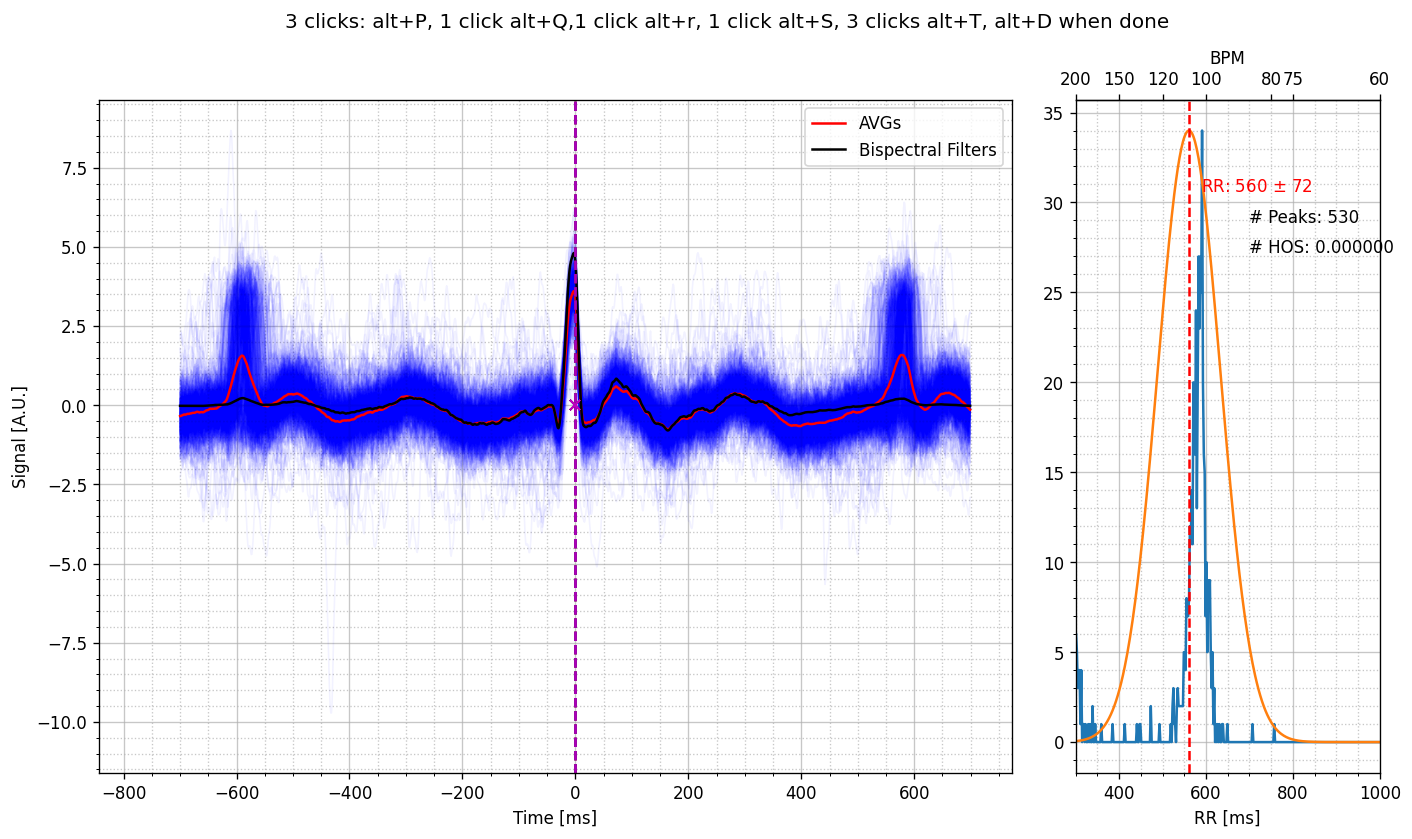

KeyboardInterrupt: 

In [6]:
beat, detect = functions.matlab_hos(data[:,fetus_index], window_size)
RR, sigma_RR, peaks, popt_RRs, yy, xx = functions.detect_beats(detect)
try:
    savgol_median = functions.savgol_filter(np.diff(peaks), 41, 3)
    avg_peaks_list = peaks[np.where(np.square((np.diff(peaks) - savgol_median) / sigma_RR) < 2)]
except:
    avg_peaks_list = peaks

peaks = avg_peaks_list
if len(peaks)<3:
    print('skipped (low peak count)')
else:
    slice_box, avg_mean,worked = functions.avg_based_QRScomplex(data[:,fetus_index],
                                                                peaks,sigma_RR, box_size=window_size)
    segmentation_data=interactive_analysis.interactive_ploter(np.array(slice_box),
                                                                time_axis-window_size/2,
                                                                add_lines=[avg_mean,beat],
                                                                sideplot=[xx,yy,popt_RRs,RR,sigma_RR,0])